 <h2>TELECOM CHURN CUSTOMER dataset analysis using decision tree method</h2>

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydot2

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install networkx==2.4

Note: you may need to restart the kernel to use updated packages.


<br>
<br>
<br>
<br>
<br>

In [8]:
import platform
import pandas as pd
import sklearn
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns

%matplotlib inline

<br>
<br>
<br>
<br>
<br>

<h2>Import the dataset</h2>
<p>In my case, tha dataset is stored in my laptop desktok. <br>So in order to import the data, I need to call it used the path below.</p>

In [9]:
path = 'C:/Users/laptop/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
# show the first 50 rows using dataframe.head() method to make it clear 

df.head(50)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<p>  Display the informations related to our dataset. </p>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
list(df.columns.values) 

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

<br>
<br>
<br>
<br>
<br>

<h2>Get the NAN values </h2>

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.dropna()
df.shape

(7043, 21)

<br>
<br>
<br>
<br>
<br>

<p> In our case, using the commandsdf.isnull and df.dropna shows that there is no Nan values in the dataset.<br> Importing the 
same dataset in Rstudio, we notice that it deleted some values. There are 11 samples that have TotalCharges set to " ", which seems like a mistake in the data. We remove those samples and set the type to numeric </p>

In [14]:
total_charges_filter = df.TotalCharges == " "
df = df[~total_charges_filter]
df.shape


(7032, 21)

In [15]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,8544-JNBOX,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


<br>
<br>
<br>
<br>
<br>

<p> We won't be using the customerID column, we can drop it</p>

In [18]:
df.drop('customerID', axis=1, inplace=True)

<br>
<br>
<br>
<br>
<br>

<p> We need to get informations about churn column in order to work with later</p>

In [19]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<br>
<br>
<br>
<br>
<br>

<p><b>We combine features into two lists so that we can analyze them jointly.</b> </p>

In [20]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

<br>
<br>
<br>
<br>
<br>

<h2> <b> Convert catagorical variables into numerical </b> </h2>

In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_feature_names = []
label_encoders = {}
for categorical in categorical_features + [target]:
    label_encoders[categorical] = LabelEncoder()
    df[categorical] = label_encoders[categorical].fit_transform(df[categorical])
    names = label_encoders[categorical].classes_.tolist()
    print('Label encoder %s - values: %s' % (categorical, names))
    if categorical == target:
        continue
    categorical_feature_names.extend([categorical + '_' + str(name) for name in names])

Label encoder gender - values: ['Female', 'Male']
Label encoder SeniorCitizen - values: [0, 1]
Label encoder Partner - values: ['No', 'Yes']
Label encoder Dependents - values: ['No', 'Yes']
Label encoder PhoneService - values: ['No', 'Yes']
Label encoder MultipleLines - values: ['No', 'No phone service', 'Yes']
Label encoder InternetService - values: ['DSL', 'Fiber optic', 'No']
Label encoder OnlineSecurity - values: ['No', 'No internet service', 'Yes']
Label encoder OnlineBackup - values: ['No', 'No internet service', 'Yes']
Label encoder DeviceProtection - values: ['No', 'No internet service', 'Yes']
Label encoder TechSupport - values: ['No', 'No internet service', 'Yes']
Label encoder StreamingTV - values: ['No', 'No internet service', 'Yes']
Label encoder StreamingMovies - values: ['No', 'No internet service', 'Yes']
Label encoder Contract - values: ['Month-to-month', 'One year', 'Two year']
Label encoder PaperlessBilling - values: ['No', 'Yes']
Label encoder PaymentMethod - values

In [25]:
df.head(11)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


<br>
<br>
<br>
<br>
<br>

<h2> Train and test the model </h2>

In [27]:
y = df['Churn']

X = df[['MonthlyCharges','tenure', 'TotalCharges', "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42, shuffle = True)

In [28]:
y = df['Churn']

X = df[['MonthlyCharges','tenure', 'TotalCharges', 'gender','SeniorCitizen',"Partner","Dependents","PhoneService","MultipleLines",
        "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
         "Contract","PaperlessBilling","PaymentMethod"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X,y)

      MonthlyCharges  tenure  TotalCharges  gender  SeniorCitizen  Partner  \
0              29.85       1         29.85       0              0        1   
1              56.95      34       1889.50       1              0        0   
2              53.85       2        108.15       1              0        0   
3              42.30      45       1840.75       1              0        0   
4              70.70       2        151.65       0              0        0   
...              ...     ...           ...     ...            ...      ...   
7038           84.80      24       1990.50       1              0        1   
7039          103.20      72       7362.90       0              0        1   
7040           29.60      11        346.45       0              0        1   
7041           74.40       4        306.60       1              1        1   
7042          105.65      66       6844.50       1              0        0   

      Dependents  PhoneService  MultipleLines  InternetService 

<br>
<br>
<br>
<br>
<br>

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

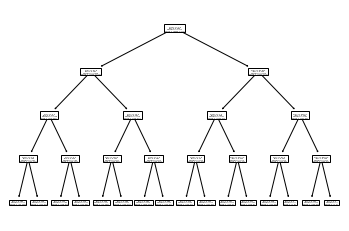

In [30]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.savefig('tree_model.png')
#plt.show() an option

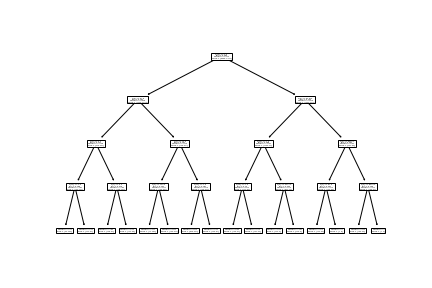

In [31]:
from IPython.display import Image 
Image(filename='tree_model.png', width=600) 

In [32]:
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Churn','Not Churn'],
                           feature_names=['MonthlyCharges','tenure', 'TotalCharges', 'gender','SeniorCitizen',"Partner","Dependents","PhoneService","MultipleLines",
                                          "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                                         "Contract","PaperlessBilling","PaymentMethod"],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

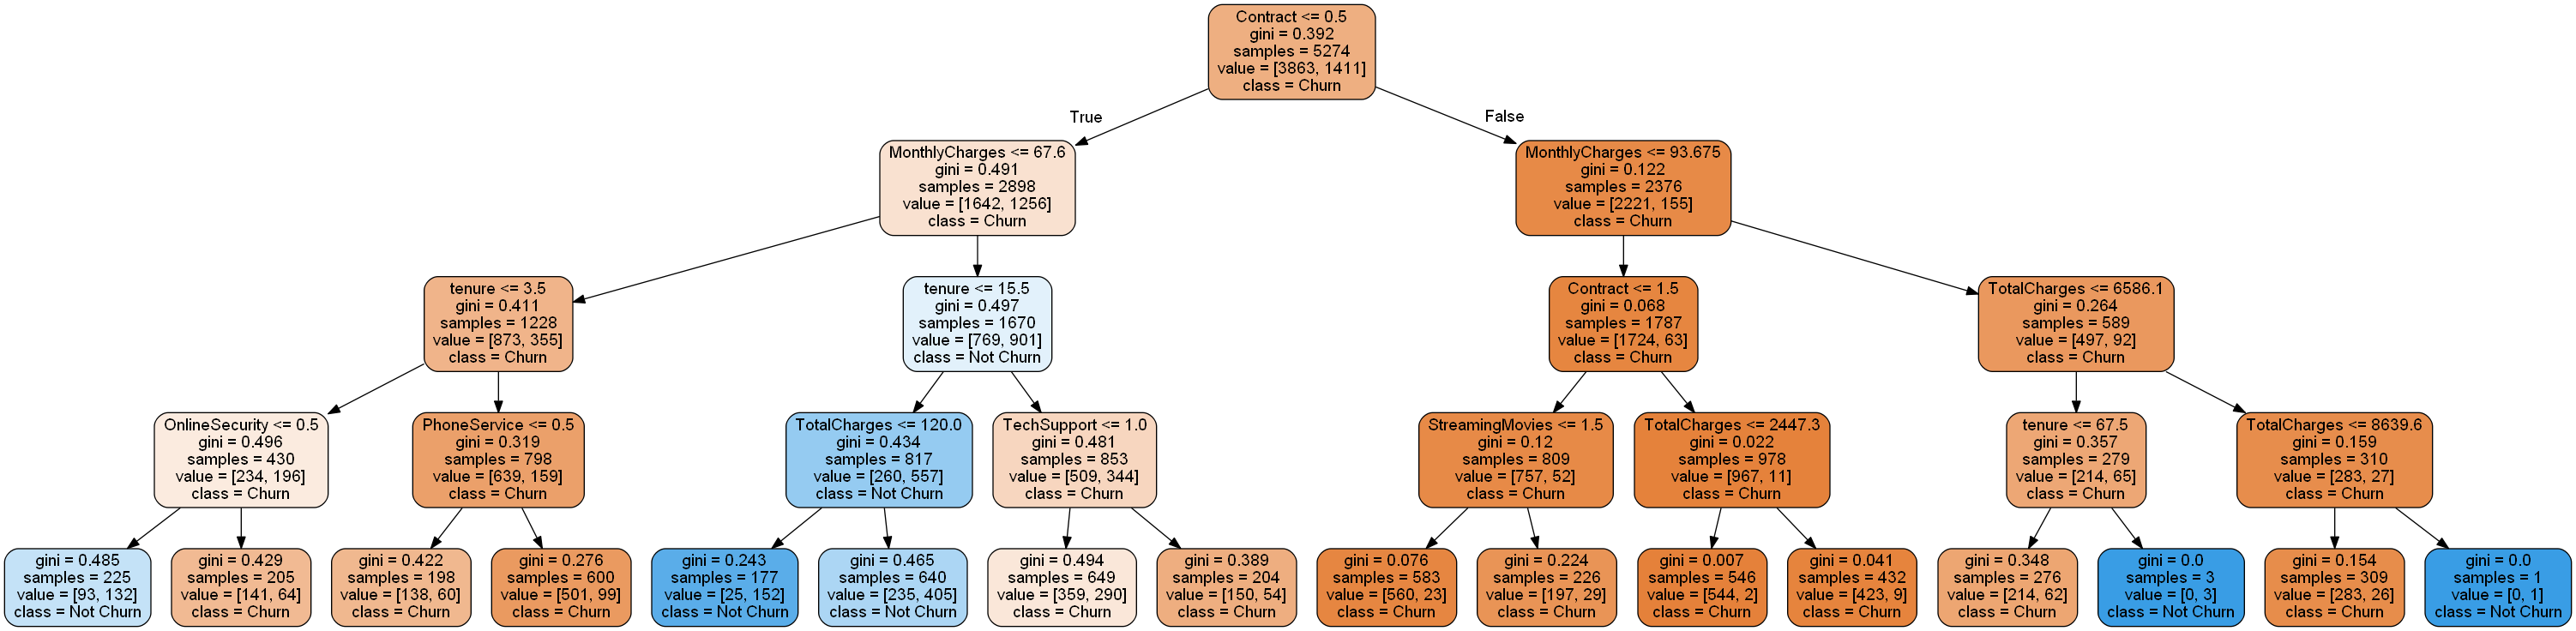

In [33]:
from IPython.display import Image 
Image(filename='tree.png', width=1000)

<p>According to the decision tree, the most influential attributes to determine how to classify customer will be chur or not are :<br>
    *contracts <br>
    *tenure <br>
    *Monthly Charges <br> </p>

<br>
<br>
<br>
<br>
<br>

<h2> Accuracy, specificity and sensitivity </h2>

In [34]:
#Predict the response ofthe dataset

y_pred = tree_model.predict(X_test)
model = tree_model.fit(X_train, y_train)

In [35]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,B,C,D,I,L,M,O,P,S,T,...,n,o,p,r,s,t,u,v,y,z
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,True,False,...,True,True,False,True,False,True,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,True,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7029,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

In [37]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.45633187772925765
Specificity: 0.8938461538461538
Accuracy: 0.7798634812286689


<br>
<br>
<br>
<br>
<br>

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [39]:
cla_CART = classification_report(y_test,y_pred)
print(cla_CART)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1300
           1       0.60      0.46      0.52       458

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [40]:
from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is {0:.1f}%".format(accuracy*100))

Accuracy is 78.0%


In [41]:
model.score(X_test, y_test)

0.7798634812286689

<br>
<br>
<br>
<br>
<br>

<h2> Divide numerical variables into ‘bins’ </h2>

In [43]:
df['MonthlyCharges'] = df.apply(lambda row: 1 if row['MonthlyCharges']>=93.657 else 0, axis=1  )
df['tenure'] = df.apply(lambda row: 1 if row['tenure']>=67.5 else 0, axis=1  )
df['TotalCharges'] = df.apply(lambda row: 1 if row['MonthlyCharges']>=93.657 else 0, axis=1  )
df['Contract'] = df.apply(lambda row: 1 if row['Contract']>=1.5 else 0, axis=1  )

<br>
<br>
<br>
<br>
<br>

<h2>‘apriori’ algorithm </h2>

In [44]:
from mlxtend.frequent_patterns import apriori, association_rules 
from apyori import apriori

In [45]:
records = []
for i in range(0, 7032):
   records.append([str(df.values[i,j]) for j in range(0, 21)])

In [56]:
association_rules = apriori(records,  min_confidence=0.25, min_length=2, max_length=5)
association_results = list(association_rules)

In [50]:
print(association_rules)

<generator object apriori at 0x00000088B67F0648>


In [51]:
def findLength(string): 
  
    # Initialize count to zero 
    count = 0
  
    # Counting character in a string 
    for i in string: 
        count+= 1
    # Returning count 
    return count 
  
# Driver code 
 
print(findLength(association_rules))


0


<br>
<br>
<br>
<br>
<br>

<h2> Churn rules </h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000088B5B58D48>,
      dtype=object)

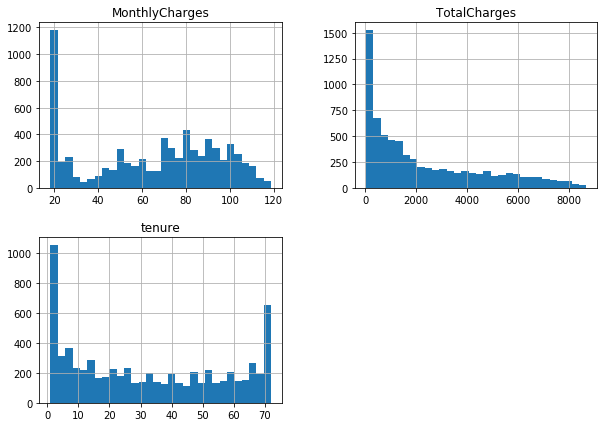

In [21]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

<br>
<br>
<br>
<br>
<br>

<p><b>We look at distributions of numerical features in relation to the target variable.
We can observe that the greater TotalCharges and tenure are the less is the probability of churn.<br>
This analysis might help us understand the relationship between chrun customers, total chargers and tenure</b></p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000088B5E2D688>,
      dtype=object)

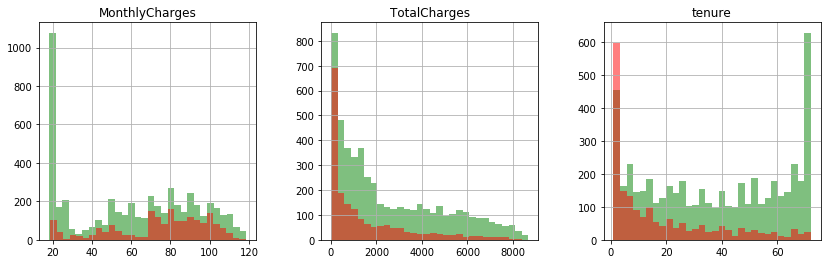

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="green", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

<br>
<br>
<br>
<br>
<br>

<p> <b>After looking at numerical variables,we look at categorical features in relation to the target variable. 
We do this only for contract feature. Users who have a month-to-month contract are more likely to churn 
than users with long term contracts.</b></p>

Text(0.5, 1.0, 'churned')

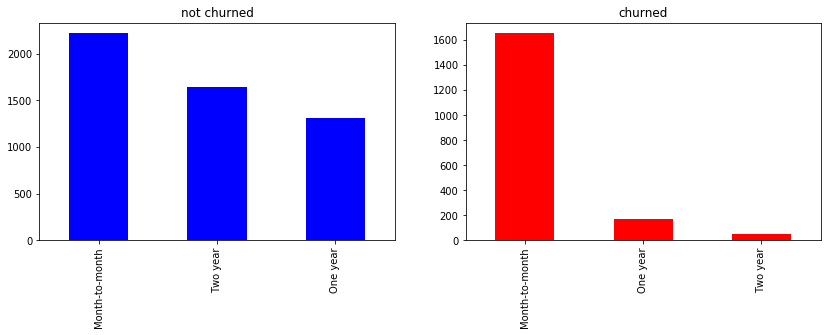

In [23]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0],color="blue").set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1],color="red").set_title('churned')

<br>
<br>
<br>
<br>
<br>

<h2> Conclusion: </h2>

<p> Customer churn is one of the most important metrics for a growing business to evaluate.
While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.
I created a simple customer churn prediction model using Telco Customer Churn dataset. 
I chose a decision tree to model churned customers, pandas for data crunching and matplotlib for visualizations. 
The decision tree showed that the most influential attributes to determine how to classify customer will be chur or not are :
<br>*contracts
<br>*tenure
<br>*Monthly Charges
<br> After severaal analyses,We can observe that the greater MonthlyCharges and tenure are the less is the probability of churn and Users who have a month-to-month contract are more likely to churn than users with long term contracts.
</p>
<br>
<br>
<br>
<h2> Arij Sahli</h2>